# The DoWhy package provides several utilities for synthesizing data.
### Knowing how data is generated is a good starting point when learning a new methodology or algorithm.

In [70]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import dowhy.datasets 

# Define auxiliary functions

In [71]:
def plot_gml(gml_graph):
    G = nx.parse_gml(synthetic_data["gml_graph"])
    pos=nx.spring_layout(G)
    nx.draw_networkx(G, pos, with_labels=True, node_size=1000, node_color="darkorange")
    return(plt.show())

In [72]:
def describe_synthetic_data(synthetic_data):
 plot_gml(synthetic_data["gml_graph"])                                               
 synthetic_data_df=synthetic_data["df"]
 #print(synthetic_data_df.head())
 print('------- Variables --------')
 print('Treatment vars:'      , synthetic_data['treatment_name'])
 print('Outcome vars:'        , synthetic_data['outcome_name'])
 print('Common causes vars:'  , synthetic_data['common_causes_names'])
 print('Instrument vars:'     , synthetic_data['instrument_names'])
 print('Effect Modifier vars:', synthetic_data['effect_modifier_names'])
 print('Frontdoor vars:'      , synthetic_data['frontdoor_variables_names'])
 print('Treatment vars:', synthetic_data['outcome_name'])
 print('-------- Corr -------')
 print(synthetic_data_df.corr())
 print('------- Head --------')
 return(synthetic_data_df)

# linear_dataset 

```
 dowhy.datasets.linear_dataset(beta,
                              num_common_causes,
                              num_samples,
                              num_instruments=0,
                              num_effect_modifiers=0,
                              num_treatments=1,
                              num_frontdoor_variables=0,
                              treatment_is_binary=True,
                              treatment_is_category=False,
                              outcome_is_binary=False,
                              stochastic_discretization=True,
                              num_discrete_common_causes=0,
                              num_discrete_instruments=0,
                              num_discrete_effect_modifiers=0,
                              stddev_treatment_noise=1,
                              stddev_outcome_noise=0.01,
                              one_hot_encode=False
                              )
```

```
Outputs a dictionary
{
        "df": data,
        "treatment_name": treatments,
        "outcome_name": outcome,
        "common_causes_names": common_causes,
        "instrument_names": instruments,
        "effect_modifier_names": effect_modifiers,
        "frontdoor_variables_names": frontdoor_variables,
        "dot_graph": dot_graph,
        "gml_graph": gml_graph,
        "ate": ate
}
```

```
The function generates a data set with [num_samples] records.
v variables - are the treatments where abs(*beta*) defines thier magnitude if continuos
y - is the outcome variable where abs(*beta*) defines its magnitude. Basically:
 y = normal(0, stddev_outcome_noise) + t @ beta [where @ is a numpy matrix multiplication alowing for beta be a vector]

the W variables commonly cause both the treatment and the outcome and are iid. if continuos then they are Norm(mue = Unif(-1,1), sigma = 1)

Instrument variables are labled Z and each one affects all treatments. i.e. if there is one instument and two treatments then z0->v0, z0->v1

X as the effect modifiers. Their number should be 0 or equal to the number of treatments (bug) they are Norm(mue = Unif(-1,1), sigma = 1)


Quartiles are used when discretised variables are spesified. They can be hot encoded.

## *beta* - defines the value magniturde for the continous treatments and outcomes variables - 'y' thus also the magnitude of the resulting ate.
### In most cases the absolute value is considered

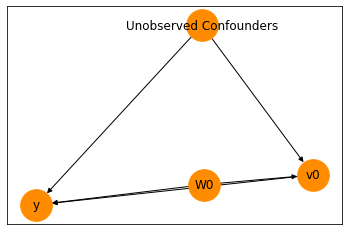

------- Variables --------
Treatment vars: ['v0']
Outcome vars: y
Common causes vars: ['W0']
Instrument vars: []
Effect Modifier vars: []
Frontdoor vars: []
Treatment vars: y
-------- Corr -------
          W0        v0         y
W0  1.000000  0.728042  0.901183
v0  0.728042  1.000000  0.953236
y   0.901183  0.953236  1.000000
------- Head --------


,W0,v0,y
0,-1.178891,False,-45.249344
1,-0.967917,False,-37.153961
2,-0.008223,True,99.679771
3,-0.014257,False,-0.553504
4,0.547881,True,121.045022


In [73]:
# create a dataset with 10 observations one binary treatment and a continous outcome affected by one common cause
synthetic_data = dowhy.datasets.linear_dataset(beta = 100,
                                               num_common_causes = 1,
                                               num_samples =10
                                               )
describe_synthetic_data(synthetic_data).head()

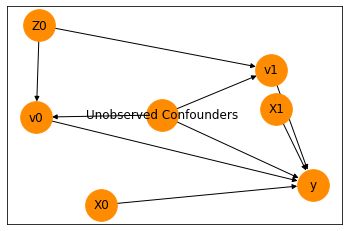

------- Variables --------
Treatment vars: ['v0', 'v1']
Outcome vars: y
Common causes vars: []
Instrument vars: ['Z0']
Effect Modifier vars: ['X0', 'X1']
Frontdoor vars: []
Treatment vars: y
-------- Corr -------
          X0        X1        Z0        v0        v1         y
X0  1.000000  0.000089 -0.416893 -0.407427 -0.417078  0.290265
X1  0.000089  1.000000 -0.196209 -0.193395 -0.190950  0.482132
Z0 -0.416893 -0.196209  1.000000  0.999799  0.999844  0.032042
v0 -0.407427 -0.193395  0.999799  1.000000  0.999638  0.032807
v1 -0.417078 -0.190950  0.999844  0.999638  1.000000  0.037866
y   0.290265  0.482132  0.032042  0.032807  0.037866  1.000000
------- Head --------


,X0,X1,Z0,v0,v1,y
0,-0.696911,0.262898,1.0,103.756250,102.061359,6808.934406
1,-0.555267,1.890000,0.0,0.903483,1.115125,227.515179
2,-0.277064,0.745404,0.0,0.033695,-0.555646,-52.362901
3,-1.162749,0.733793,0.0,-1.182927,0.458743,-73.753303
4,-0.647548,1.321522,0.0,1.394780,-1.495278,-42.956262


In [107]:
# Two continuos treatments, no common cause, an instrumental variable and two effect modifiers - linearly added appropriately
synthetic_data = dowhy.datasets.linear_dataset(
                              beta                          = 100,
                              num_common_causes             =   0,
                              num_samples                   =  20,
                              num_instruments               =   1,
                              num_effect_modifiers          =   2, # has to be equal to num_treatments
                              num_treatments                =   2,
                              num_frontdoor_variables       =   0,
                              treatment_is_binary           = False,
                              #treatment_is_category         = False,
                              outcome_is_binary             = False,
                              #stochastic_discretization     = True,
                              num_discrete_common_causes    =   0,
                              num_discrete_instruments      =   0,
                              num_discrete_effect_modifiers =   0,
                              #stddev_treatment_noise        =   1,
                              #stddev_outcome_noise          =  0.01,
                              one_hot_encode                = False
                                               )
describe_synthetic_data(synthetic_data).head()

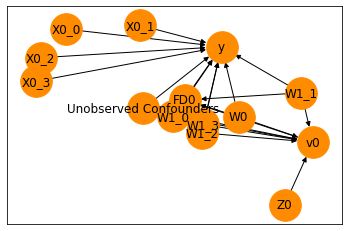

------- Variables --------
Treatment vars: ['v0']
Outcome vars: y
Common causes vars: ['W0', 'W1_0', 'W1_1', 'W1_2', 'W1_3']
Instrument vars: ['Z0']
Effect Modifier vars: ['X0_0', 'X0_1', 'X0_2', 'X0_3']
Frontdoor vars: ['FD0']
Treatment vars: y
-------- Corr -------
           FD0      X0_0      X0_1      X0_2      X0_3        Z0        W0  \
FD0   1.000000 -0.219043 -0.053031  0.153020  0.119054  0.912869  0.000916   
X0_0 -0.219043  1.000000 -0.333333 -0.333333 -0.333333 -0.302614  0.225909   
X0_1 -0.053031 -0.333333  1.000000 -0.333333 -0.333333 -0.060523  0.304756   
X0_2  0.153020 -0.333333 -0.333333  1.000000 -0.333333  0.181568 -0.202556   
X0_3  0.119054 -0.333333 -0.333333 -0.333333  1.000000  0.181568 -0.328109   
Z0    0.912869 -0.302614 -0.060523  0.181568  0.181568  1.000000 -0.252924   
W0    0.000916  0.225909  0.304756 -0.202556 -0.328109 -0.252924  1.000000   
W1_0  0.189649 -0.333333 -0.066667  0.200000  0.200000  0.181568 -0.201930   
W1_1  0.234156  0.200000 -0.06

,FD0,X0_0,X0_1,X0_2,X0_3,Z0,W0,W1_0,W1_1,W1_2,W1_3,v0,y
0,-377.498336,0.0,0.0,0.0,1.0,0.0,-1.100383,0.0,0.0,0.0,1.0,-10.653818,-11374.686924
1,4938.919223,0.0,0.0,0.0,1.0,1.0,-0.015879,0.0,0.0,1.0,0.0,138.917468,149315.349029
2,1321.855425,1.0,0.0,0.0,0.0,0.0,-0.563677,0.0,0.0,1.0,0.0,37.129376,40348.133545
3,4274.592304,0.0,0.0,1.0,0.0,1.0,0.320443,0.0,1.0,0.0,0.0,120.241914,127047.816520
4,4132.998760,0.0,1.0,0.0,0.0,1.0,-0.218257,0.0,1.0,0.0,0.0,116.258733,124320.345339


In [116]:
# Hot Encoding
synthetic_data = dowhy.datasets.linear_dataset(
                              beta                          = 100,
                              num_common_causes             =   2,
                              num_samples                   =  20,
                              num_instruments               =   1,
                              num_effect_modifiers          =   1, 
                              num_treatments                =   1,
                              num_frontdoor_variables       =   1,
                              treatment_is_binary           = False,
                              #treatment_is_category         = False,
                              outcome_is_binary             = False,
                              #stochastic_discretization     = True,
                              num_discrete_common_causes    =   1, #of the total num_common_causes
                              num_discrete_instruments      =   1,
                              num_discrete_effect_modifiers =   1,
                              #stddev_treatment_noise        =   1,
                              #stddev_outcome_noise          =  0.01,
                              one_hot_encode                = True
                                               )
describe_synthetic_data(synthetic_data).head()